In [4]:
import requests
import pandas as pd
import seaborn as sns
from datetime import datetime, timedelta

In [2]:
# Get a list of all items and the itemID in Old School RuneScape from the OSRS Wiki API

import requests
import pandas as pd

def get_item_info(item_id):
    url = f"https://prices.runescape.wiki/api/v1/osrs/mapping"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        for item in data:
            if item['id'] == item_id:
                return {
                    'id': item['id'],
                    'name': item['name']
                }
    return None

# Get all item mappings
url = "https://prices.runescape.wiki/api/v1/osrs/mapping"
response = requests.get(url)
if response.status_code == 200:
    all_items = response.json()
else:
    print("Failed to retrieve item data")
    exit()

# Create a list of dictionaries with id and name
items = [{'id': item['id'], 'name': item['name']} for item in all_items]

# Create a DataFrame
df = pd.DataFrame(items)

# Display the first few rows of the table
print(df.head())

# Optionally, save to a CSV file
# df.to_csv('osrs_items.csv', index=False)

# Print total number of items
print(f"\nTotal number of items: {len(df)}")

      id                   name
0  10344         3rd age amulet
1  20011            3rd age axe
2  12424            3rd age bow
3  12437          3rd age cloak
4  23345  3rd age druidic cloak

Total number of items: 4140


385
                     Average High Price  Average Low Price  High Price Volume  \
Date                                                                            
2024-06-09 15:00:00                 936                923             134290   
2024-06-09 16:00:00                 949                938             102186   
2024-06-09 17:00:00                 967                950              82215   
2024-06-09 18:00:00                 976                962             172519   
2024-06-09 19:00:00                 968                958              99298   
...                                 ...                ...                ...   
2024-06-24 15:00:00                 846                838             110537   
2024-06-24 16:00:00                 849                836              72165   
2024-06-24 17:00:00                 847                838              90178   
2024-06-24 18:00:00                 851                843              60911   
2024-06-24 19:00:00     

<Axes: xlabel='Average High Price', ylabel='Count'>

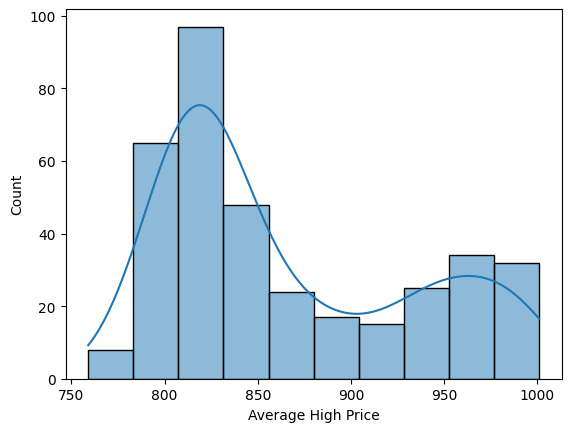

In [11]:
# Code that will show the price history of an item

import requests
import pandas as pd
from datetime import datetime, timedelta

def get_item_id(item_name):
    url = "https://prices.runescape.wiki/api/v1/osrs/mapping"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        for item in data:
            if item['name'].lower() == item_name.lower():
                return item['id']
    return None

def get_historical_data(item_name):
    item_id = get_item_id(item_name)
    if not item_id:
        print(f"Item '{item_name}' not found.")
        return None

    # Calculate the timestamp for 180 days ago
    end_date = datetime.now()
    start_date = end_date - timedelta(days=180)
    timestamp = int(start_date.timestamp())

    print(item_id)

    url = f"https://prices.runescape.wiki/api/v1/osrs/timeseries?timestep=1h&id={item_id}"
    response = requests.get(url, allow_redirects=False)
    
    if response.status_code == 200:
        data = response.json()['data']
        df = pd.DataFrame(data)
        
        # Convert timestamp to datetime
        df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
        
        # Rename columns for clarity
        df = df.rename(columns={
            'timestamp': 'Date',
            'avgHighPrice': 'Average High Price',
            'avgLowPrice': 'Average Low Price',
            'highPriceVolume': 'High Price Volume',
            'lowPriceVolume': 'Low Price Volume'
        })
        
        # Set Date as index
        df.set_index('Date', inplace=True)
        
        return df
    else:
        print(f"Failed to retrieve data. Status code: {response.status_code}")
        return None

# Example usage
item_name = input("Enter the name of the OSRS item: ")
historical_data = get_historical_data(item_name)

if historical_data is not None:
    print(historical_data)
    
    # Optionally, save to CSV
    # historical_data.to_csv(f"{item_name}_historical_data.csv")

sns.histplot(historical_data['Average High Price'], kde=True)